# Microsoft Studios Movie Analysis
### Phase 1 Project - Sidney Kung

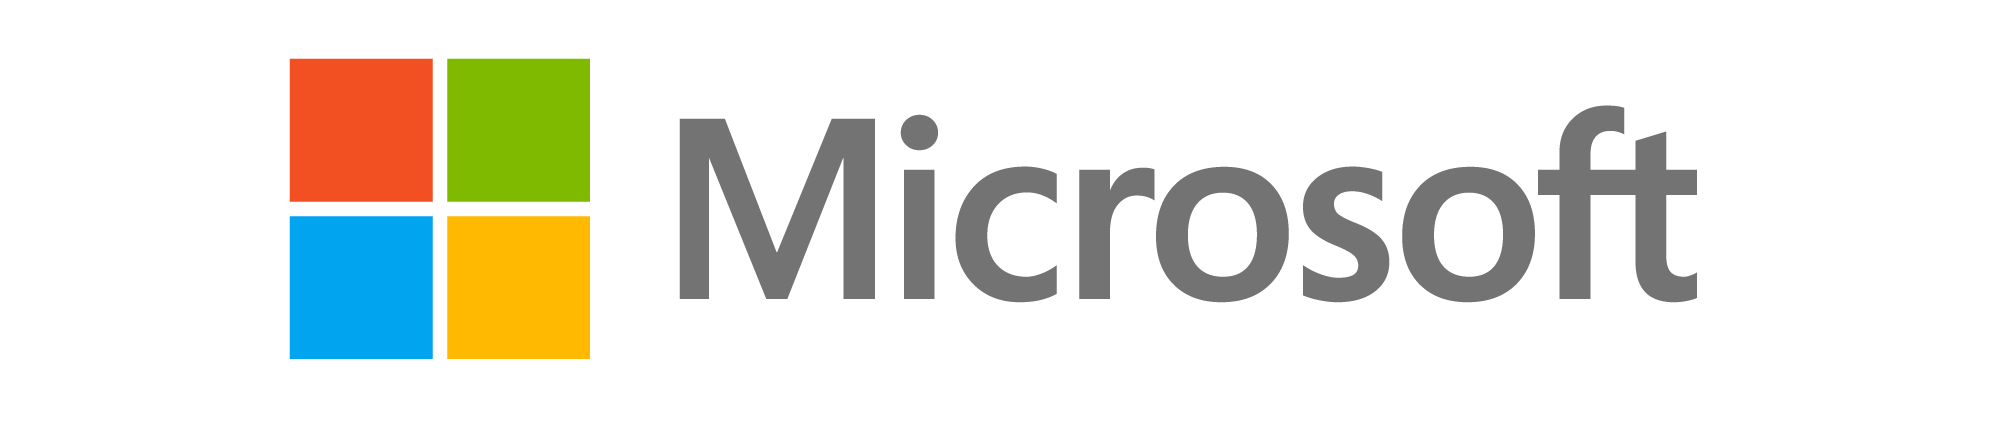

## Overview
This project analyzes the measurements of popularity for movies released in theaters in the past ten years, using data collected from [IMDB](imdb.com) and [theMovieDB](https://www.themoviedb.org/). Descriptive analysis of this data shows that movies should be released during the early summer or winter, with a budget ranging between 10 million and 75 million dollars. Additionally, the studio’s first films should be within the Music, Documentary, and Biography genres. Microsoft can use this analysis to open a movie production studio and successfully enter the industry.

## Business Problem
Microsoft has decided to create a new movie studio, and the company wants to gain a better understanding of the movie industry. The task is to explore what type of films succeed at the box office. Key findings should be translated to actionable insights that the head of Microsoft’s new movie studio can use to help decide what type of films to create.

## Questions:
This analysis will be investigating three main questions through exploratory data analysis.
1.	What time of the year are movies the most popular?
2.	What is an appropriate budget range for popular movies?
3.	What is the most popular movie genre?

## Understanding the Data

This analysis performs **descriptive analysis** on the dataset `all_movies`, which was compiled from four subset files of data from the websites IMDB.com and theMovieDB.org. Each subset contained useful information about measures of popularity for movies. I cleaned the subsets before merging them to the dataframe `all_movies`, and imported it here to use for analysis. 

The data cleaning notebook can be found in this repository under the name `data_cleaning.ipynb`, or click [here](https://github.com/sidneykung/Movie-Data-Analysis/blob/master/data_cleaning.ipynb). 

Origin file and purpose:
1. imdb.title.basics.csv.gz
	* Base information for each movie from IMDB.com
2. imdb.title.ratings.csv.gz
	* Average rating for each movie, in IMDB.com metrics
3. tmdb.movies.csv.gz
	* Average rating for each movie, in theMovieDB.org metrics
4. tn.movie_budgets.csv.gz
	* Financial data for each movie from theMovieDB.org

## Analysis

In [2]:
# importing necessary libraries
import pandas as pd
import numpy as np
import datetime
import matplotlib 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
# loading all_movies_df and setting it to the variable 'all_movies'
all_movies = pd.read_csv('all_movies_df.csv')

## Average Gross Each Month
It is essential that movies are released at the right time of the year, to ensure that enough customers buy tickets at the box office. I will be calculating the average  gross, domestic and worldwide, for all relevant movies the `all_movies` dataset. This should yield the optimal release times are during the year.

In [4]:
# Creating a new column of release dates without year
all_movies['release_month'] = pd.DatetimeIndex(all_movies['release_date_x']).month

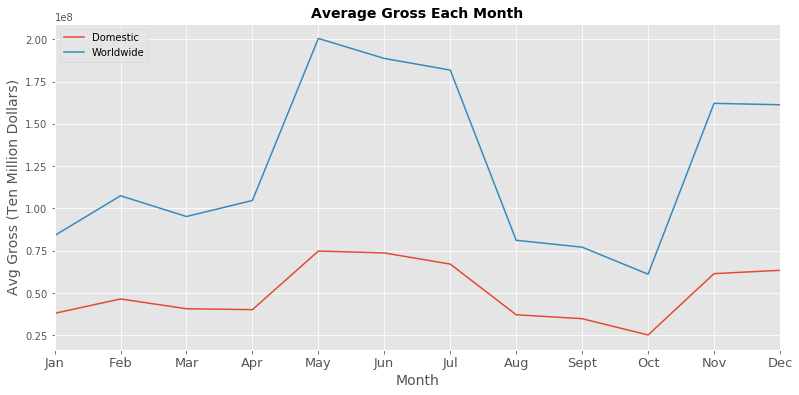

In [5]:
# x-axis: sorting dataframe by months and setting that equal to months
all_movies.sort_values(by='release_month', ascending=True)
months = sorted(all_movies['release_month'].unique())
# y-axis: average gross (ten million dollars)
# comparing domestic_gross and worldwide_gross
d_gross = all_movies.groupby('release_month')['domestic_gross'].mean()
w_gross = all_movies.groupby('release_month')['worldwide_gross'].mean()

# creating a line plot
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(13,6))
ax.plot(months, d_gross)
ax.plot(months, w_gross)

# legend
plt.legend(['Domestic', 'Worldwide'], loc=2)

# setting title and axis labels
ax.set_xlabel('Month', fontsize=14)
ax.set_ylabel('Avg Gross (Ten Million Dollars)', fontsize=14)
ax.set_title('Average Gross Each Month', fontsize=14, weight='bold')

# setting x-axis labels to match each month
ax.set_xlim(1, 12)
ax.set_xticks((1,2,3,4,5,6,7,8,9,10,11,12))
ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec'], fontsize=13)

plt.savefig('visualizations/avg_gross.png', bbox_inches = "tight", pad_inches=.5)
plt.show()

The average gross earned each month is approximately parallel for domestic and worldwide distribution. The one exception is between March and April; while the average domestic gross declines, average worldwide gross increases. 

Movies earn the highest worldwide gross during the early summer, between April and July. There is also another ~146% increase spike between October and November. Therefore, the release periods for optimal worldwide and domestic gross are during the early summer and winter seasons, aimed around those months.


## Average Return on Investment (ROI) 
Each movie venture is an investment. Which means that understanding the relationship between the production budget for each movie and its return on investment (ROI) is essential. This information can help Microsoft allocate an appropriate budget range for future movies.

In [6]:
# calculating the ROI for each movie by dividing the 'worldwide_gross' and 'production_bugdet' columns, multipling 100 to get a percentage, and creating new column 'roi'
all_movies['roi'] = (all_movies['worldwide_gross'] / all_movies['production_budget']) * 100

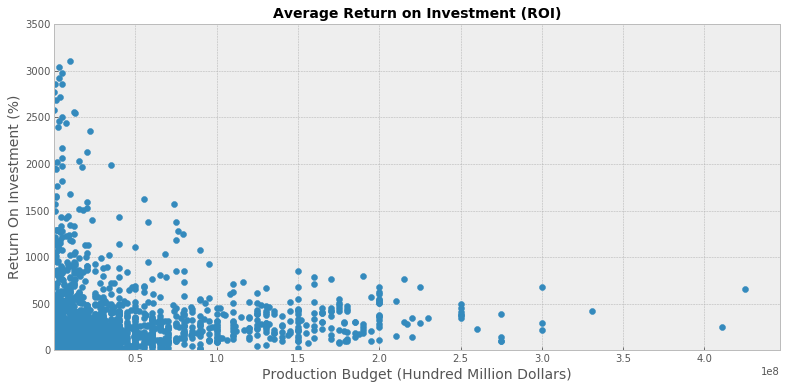

In [7]:
# x-axis
prod_budget = all_movies['production_budget']
# y-axis
roi = all_movies['roi']

# creating a scatter plot
plt.style.use('bmh')
fig, ax = plt.subplots(figsize=(13,6))
roi_plot = ax.scatter(prod_budget, roi)

# setting title, axis labels and limits
ax.set_xlabel('Production Budget (Hundred Million Dollars)', fontsize=14)
ax.set_ylabel('Return On Investment (%)', fontsize=14)
ax.set_title('Average Return on Investment (ROI)', fontsize=14, weight='bold')
ax.set_xlim(.1)
ax.set_ylim(0, 3500)

plt.savefig('visualizations/avg_roi.png', bbox_inches = "tight", pad_inches=.5)
plt.show()

There is a density of production budgets between 10 and 75 million. Movies in this budget range have the highest ROI in general, with a high of approximately 3200%. Beyond that range, other movies don’t have an ROI beyond 1000%.

## Average Budget According to Runtime
When working with a written script, the length of the movie can be estimated. Therefore, it’s important to plan for an expected budget before production. 


In [8]:
# calculating revenue for each movie by subtracting 'production_budget' by 'worldwide_gross', and creating a new column called 'revenue'
all_movies['raw_revenue'] = all_movies['worldwide_gross'] - all_movies['production_budget']

# binning 'revenue' column by IQR intervals, and calculating to exclude outliers
all_movies['revenue'] = pd.cut(all_movies['raw_revenue'], bins=[-1614407,13874970,78809720,118214580], labels=['low','medium', 'high'])

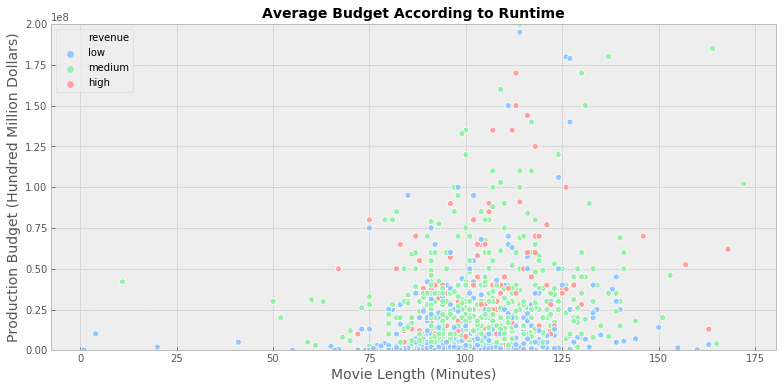

In [9]:
# create scatterplot using seaborn
plt.style.use('seaborn-pastel')
fig, ax = plt.subplots(figsize=(13,6))
sns.scatterplot(data=all_movies, x="runtime_minutes", y="production_budget", hue="revenue", hue_order=['low','medium','high'])

# legend in upper left corner
plt.legend(loc=2)

# setting title, axis labels and y-limit
ax.set_xlabel('Movie Length (Minutes)', fontsize=14)
ax.set_ylabel('Production Budget (Hundred Million Dollars)', fontsize=14)
ax.set_title('Average Budget According to Runtime', fontsize=14, weight='bold')

# set y-limit
ax.set_ylim(0, 200000000)

plt.savefig('visualizations/avg_budget_runtime.png', bbox_inches = "tight", pad_inches=.5)
plt.show()

By analyzing the placement of low, medium, and high revenue movies on the ‘Average Budget According to Runtime’ graph, it can be understood that movies with runtimes less than an hour don’t make a high revenue. Additionally, high revenue movies typically run between 75 to 125 minutes.

*Note that the approximate range for revenue is: less than 14 million for **low**, 14 million to 80 million for **medium**, and greater than 80 million for **high**.*

## Average Rating per Genre
With the wide range movie genres, it’s important to strategically select the most popular and lucrative genres among audience opinion. We can discover these genres by analyzing the average user rating for each genre on both IMDB.com and theMovieDB.com.

In [10]:
# creating new df with 'genre', 'imdb_avg_rating', 'db_popularity' columns from 'all_movies'
all_genres = all_movies[['genres', 'imdb_avg_rating','db_popularity']].copy()

# replacing 'missing' with NaN value and dropping those rows
all_genres['genres'] = all_genres['genres'].replace('missing', np.NaN)
all_genres.dropna(inplace=True)
# splitting 'genres' column
all_genres[['Genre_1','Genre_2','Genre_3']] = all_genres.genres.str.split(",",expand=True,)

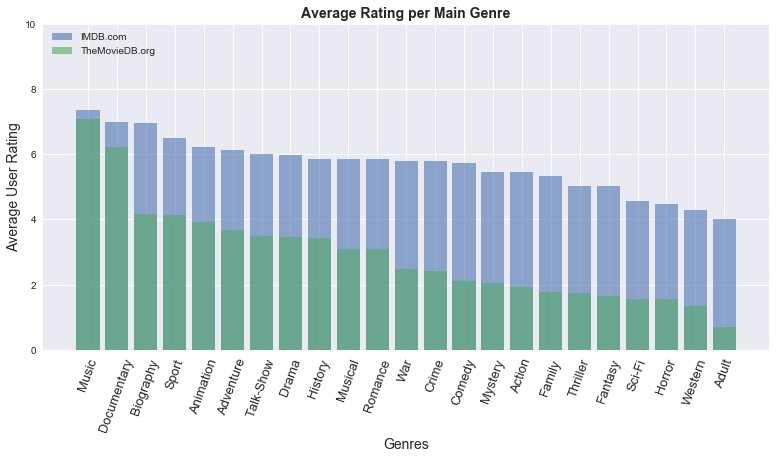

In [11]:
# y-axis
imdb_rating = all_genres.groupby('Genre_1')['imdb_avg_rating'].mean().sort_values(ascending=False)
db_rating = all_genres.groupby('Genre_1')['db_popularity'].mean().sort_values(ascending=False)
# x-axis
categories = imdb_rating.index

# creating a bar plot
plt.style.use('seaborn')
fig, ax = plt.subplots(figsize=(13,6))
ax.bar(categories, imdb_rating, alpha=0.6)
ax.bar(categories, db_rating, alpha=0.6)

# setting title and axis labels
ax.set_xlabel('Genres', fontsize=14)
plt.xticks(fontsize=13, rotation=70)
ax.set_ylabel('Average User Rating', fontsize=14)
ax.set_title('Average Rating per Main Genre', fontsize=14, weight='bold')

# setting legend and ylim
plt.legend(['IMDB.com', 'TheMovieDB.org'], loc=2)
ax.set_ylim(0, 10)

plt.savefig('visualizations/avg_rating.png', bbox_inches = "tight", pad_inches=.5)
plt.show()

Across both IMDB and theMovieDB, Music, Documentary, Biography, Sport and Animation are the highest rated genres. On the other hand, Adult, Western and Horror were the lowest rated genres. Additionally, there is a strong relationship between the ratings on IMBD and theMovieDB.

## Conclusions
-	**Release movies during the early summer and winter.** From April to July and October to November, there is a record of drastically increasing average domestic and worldwide gross.
-	**Expect a production budget between 10 million and 75 million dollars.** On average, this range has the highest Return on Investment (ROI).
-	**Microsoft Studio’s first films should be within the Music, Documentary, and Biography genres.** Across IMDB and theMovieDB, these genres have ranked the highest among user reviews.
-	**These first films should range between 75 and 125 minutes.** High revenue movies typically stayed in this range, with varying production budgets.

## Next Steps
Further analyses could yield additional insights on producing popular movies:
-	Webscraping data from **popular streaming services**, such as Netflix, could reveal whether theater release or streaming release is more profitable.
-	Additional data on each movie’s **gross in other specific countries** could provide clarification on why average domestic gross and average worldwide gross is parallel each month of the year.
-	This analysis included movie data from 2010-2020. Narrowing down to a closer look at the data from the last 5 years, or even expanding investigation to 20 years in the past could provide more information about **year-based trends**.
-	Webscraping review data with **written text reviews** could introduce the characteristics of each genre that general audiences like or dislike.